# Video Presentation
https://youtu.be/JT8jXVy08Fg

# Final Capstone Project
## MAP 6690 - Machine Learning for Data Science
### 2023 Summer

## Alpha Team:
### Hector Gavilanes
### Clayton Carpenter
### Michael Underwood

# Libraries

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 100) # displays all columns

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import mutual_info_regression

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

import xgboost as xgb
from xgboost import XGBClassifier, plot_tree

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/map-6990-summer-2023-capstone-project-kaggle-cus/sample_submission.csv
/kaggle/input/map-6990-summer-2023-capstone-project-kaggle-cus/train.csv
/kaggle/input/map-6990-summer-2023-capstone-project-kaggle-cus/test.csv


## Custom colors

In [5]:
# Creating custom color palette
custom_colors = ['#00ACC1',  # Teal
                 '#CE93D8',  # Light Purple
                 '#900C3F',  # Wine
                 '#FFC300',  # Orange
                 '#FF5733']  # Red

# Datasets

In [6]:
# Load the training data from the specified address
train_original = pd.read_csv('/kaggle/input/map-6990-summer-2023-capstone-project-kaggle-cus/train.csv')

# Outline
### 01 - Business Case
### 02 - Data Preparation
### 03 - Feature Engineering
### 04 - Exploratory Data Analysis (EDA)
### 05 - Model Building
### 06 - Model Performance & Selection
### 07 - Conclusion

# 01 - Business Case
In today's competitive business landscape, we explore a classifier machine learning model for customer churn probabilities, 
highlighting the importance of churn predictions, and how advanced analytical techniques are reshaping the way 
organizations approach customer relationship management.
This can have significant financial implications, as acquiring new customers typically costs more than 
retaining existing ones. In response, businesses are increasingly turning to machine learning to develop predictive models
that estimate the probability of customer churn. These models enable companies
to proactively identify at-risk customers, personalize retention strategies, and optimize customer engagement efforts.

# 02- Data Preparation

In [7]:
# Create a working copy of the original DataFrame
train_data = train_original.copy()

In [8]:
# Print basic dataset info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                5634 non-null   int64  
 1   customerID        5634 non-null   object 
 2   gender            5634 non-null   object 
 3   SeniorCitizen     5634 non-null   int64  
 4   Partner           5634 non-null   object 
 5   Dependents        5634 non-null   object 
 6   tenure            5634 non-null   int64  
 7   PhoneService      5634 non-null   object 
 8   MultipleLines     5634 non-null   object 
 9   InternetService   5634 non-null   object 
 10  OnlineSecurity    5634 non-null   object 
 11  OnlineBackup      5634 non-null   object 
 12  DeviceProtection  5634 non-null   object 
 13  TechSupport       5634 non-null   object 
 14  StreamingTV       5634 non-null   object 
 15  StreamingMovies   5634 non-null   object 
 16  Contract          5634 non-null   object 


In [9]:
# Drop null records
train_data = train_data.dropna()

# Drop unecessary features
train_data = train_data.drop(['ID'], axis=1)

# Check for null values
train_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# Rename columns
train_data = train_data.rename(columns={ 'gender': 'Gender','tenure': 'Tenure'})

In [11]:
# Check duplicated rows, or records

train_data.loc[train_data.duplicated()]

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [12]:
# Drop unecessary features
train_data = train_data.drop(['customerID'], axis=1)

## Numerical Features

In [13]:
# Descriptive statistics for numerical features
train_data.describe()

,SeniorCitizen,Tenure,MonthlyCharges,Churn
count,5634.000000,5634.000000,5634.000000,5634.000000
mean,0.163294,32.485091,64.929961,0.265353
std,0.369667,24.568744,30.138105,0.441560
min,0.000000,0.000000,18.400000,0.000000
25%,0.000000,9.000000,35.662500,0.000000
50%,0.000000,29.000000,70.500000,0.000000
75%,0.000000,55.000000,90.000000,1.000000
max,1.000000,72.000000,118.750000,1.000000


## Categorical Features

In [14]:
# Descriptive statistics for categorical features
categorical_columns = train_data.describe(include = "object")

### Encoder for Total Charges
- TotalCharges has an error when trying to convert from categorical feature to numerical data type.

In [15]:
try:
    train_data['TotalCharges'] = train_data['TotalCharges'].astype(int)
except ValueError as ve:
    print (ve)

invalid literal for int() with base 10: '1701.65'


- There are empty values. 

In [16]:
train_data['MonthlyCharges'] = train_data['MonthlyCharges'].astype(int)

In [17]:
for column in categorical_columns:
    train_data[column] = LabelEncoder().fit_transform(train_data[column])

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Gender            5634 non-null   int64
 1   SeniorCitizen     5634 non-null   int64
 2   Partner           5634 non-null   int64
 3   Dependents        5634 non-null   int64
 4   Tenure            5634 non-null   int64
 5   PhoneService      5634 non-null   int64
 6   MultipleLines     5634 non-null   int64
 7   InternetService   5634 non-null   int64
 8   OnlineSecurity    5634 non-null   int64
 9   OnlineBackup      5634 non-null   int64
 10  DeviceProtection  5634 non-null   int64
 11  TechSupport       5634 non-null   int64
 12  StreamingTV       5634 non-null   int64
 13  StreamingMovies   5634 non-null   int64
 14  Contract          5634 non-null   int64
 15  PaperlessBilling  5634 non-null   int64
 16  PaymentMethod     5634 non-null   int64
 17  MonthlyCharges    5634 non-null  

# 03 - Exploratory Data Analysis (EDA)

In [93]:
from ydata_profiling import ProfileReport

# Produce and save the profiling report
profile = ProfileReport(train_original,title="Churn Profile Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Categorical Features (EDA)
- We will use the original DataFrame for this section.
### Senior Citizen
- This feature is already in the correct format.

In [20]:
# Calculate proportions
senior_counts = train_original['SeniorCitizen'].value_counts()
senior_proportions = senior_counts / len(train_original)

# Print frequency table
print(senior_counts)

0    4714
1     920
Name: SeniorCitizen, dtype: int64


<Axes: xlabel='SeniorCitizen', ylabel='count'>

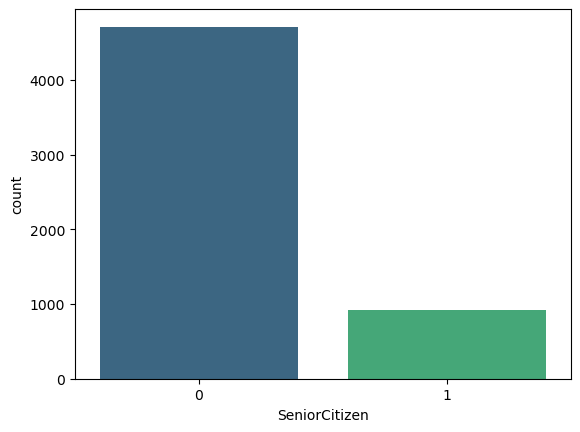

In [21]:
# Create frequency plot
sns.countplot(x='SeniorCitizen', data=train_original, palette='viridis')

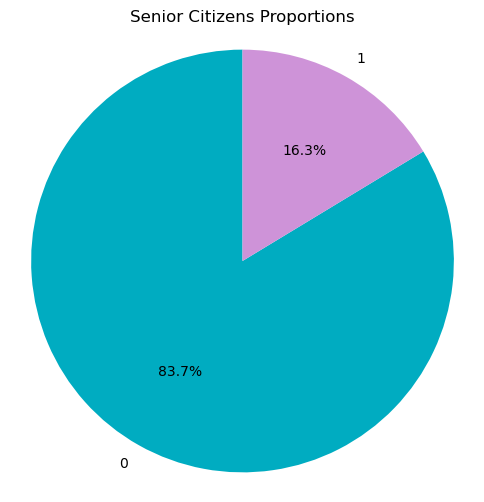

In [22]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(senior_proportions, labels=senior_proportions.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('Senior Citizens Proportions')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

### Tenure

In [23]:
# Tenure unique values
tenure = train_data['Tenure'].unique()

# Sort the unique values
np.sort(tenure)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [24]:
# Create frequency table
train_data['Tenure'].value_counts()

1     487
72    292
2     187
3     150
71    142
     ... 
21     45
44     43
28     42
36     40
0       8
Name: Tenure, Length: 73, dtype: int64

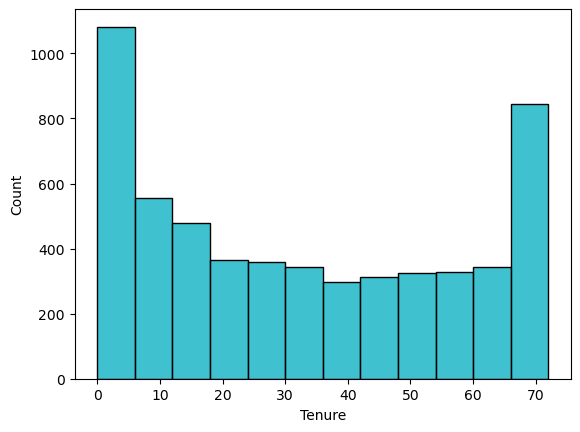

In [25]:
# Create histogram
sns.histplot(train_data['Tenure'], bins=12, color='#00ACC1')

# Show the plot
plt.show()
plt.close()

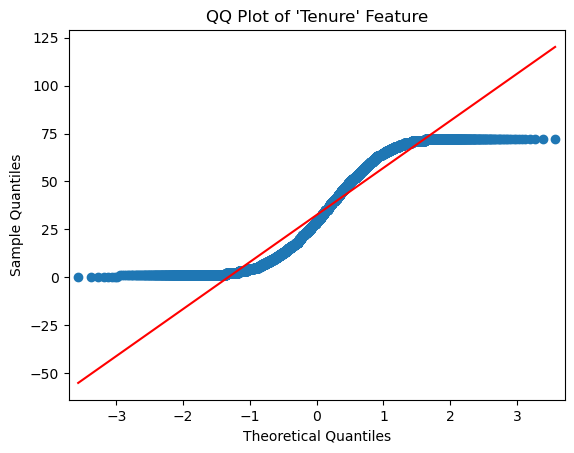

In [26]:
# Create a QQ plot for the 'Tenure' feature
sm.qqplot(train_data['Tenure'], line='s')

# Set plot labels and title
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("QQ Plot of 'Tenure' Feature")

# Show the plot
plt.show()
plt.close()

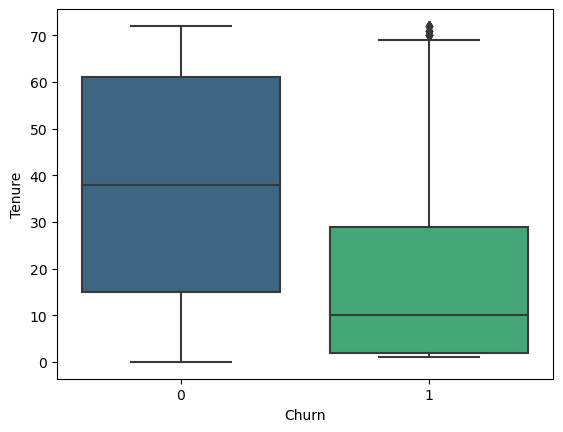

In [27]:
# Plot boxplot - churn vs tenure
sns.boxplot(x='Churn', y='Tenure', data=train_data, palette='viridis')

# Show the plot
plt.show()
plt.close()

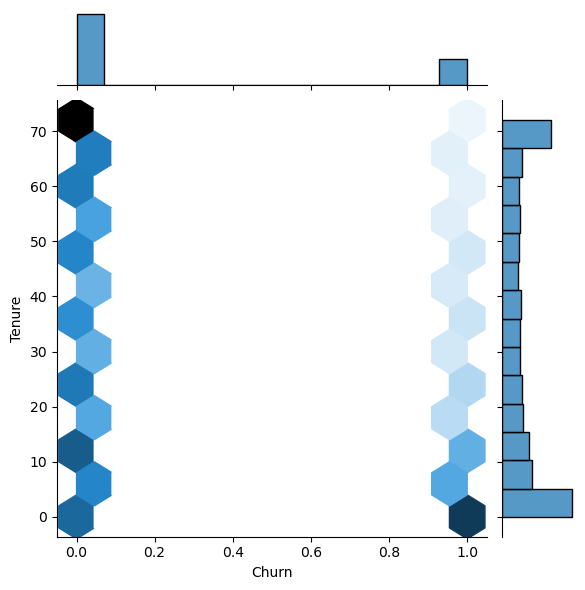

In [28]:
# Plot scatterplot - churn vs tenure
sns.jointplot(x='Churn', y='Tenure', data=train_data, palette='viridis', kind='hex')

# Save the graph
#plt.savefig("tenure_jointplot.svg")

# Show the plot
plt.show()
plt.close()

In [29]:
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline

# Plot scatterplot - churn vs tenure

tenure_plot = train_data.groupby('Tenure').Churn.mean().reset_index()
plot_data = [
    go.Scatter(
        x=tenure_plot['Tenure'],
        y=tenure_plot['Churn'],
        mode='markers',
        marker= dict(
            size=5,
            line= dict(width=0.8),
            color='purple'
        ),
    )
]

plot_layout = go.Layout(
    yaxis= {'title': "Churn"},
    xaxis= {'title': "Tenure"},
    title= "Tenure vs Churn rate",
)
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

# Save the graph
#plt.savefig("tenure_v_churn.svg")

# Show the plot
plt.show()
plt.close()

### Monthly Charges

In [30]:
# Tenure unique values
monthly = train_data['MonthlyCharges'].unique()

# Sort the unique values
np.sort(monthly)

array([ 18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  31,
        33,  34,  35,  36,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118])

In [31]:
# Create frequency table
train_data['MonthlyCharges'].value_counts()

19     465
20     430
25     153
24     147
80     136
      ... 
31       6
118      6
42       5
28       2
22       1
Name: MonthlyCharges, Length: 98, dtype: int64

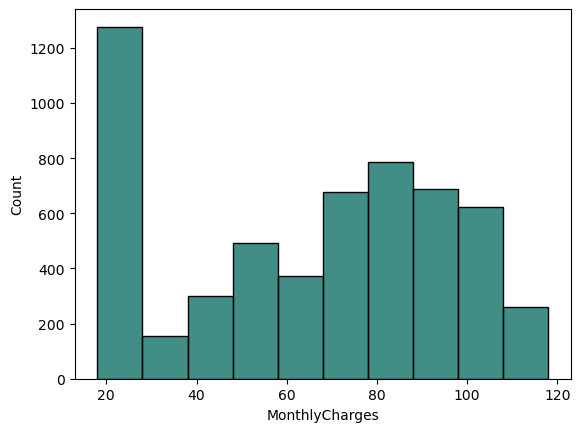

In [32]:
# Create histogram
sns.histplot(train_data['MonthlyCharges'], bins=10, color='#00695C')

# Show the plot
plt.show()
plt.close()

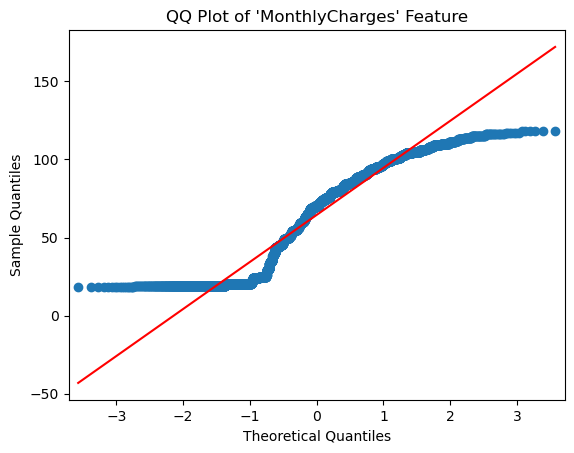

In [33]:
# Create a QQ plot for the 'MonthlyCharges' feature
sm.qqplot(train_data['MonthlyCharges'], line='s')

# Set plot labels and title
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("QQ Plot of 'MonthlyCharges' Feature")

# Show the plot
plt.show()
plt.close()

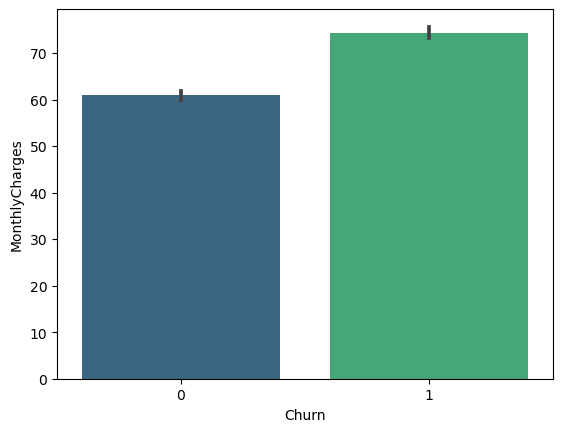

In [34]:
# Plot boxplot - churn vs MonthlyCharges
sns.barplot(x='Churn', y='MonthlyCharges', data=train_data, palette='viridis')

# Show the plot
plt.show()
plt.close()

## Total Charges

In [35]:
# Tenure unique values
total = train_data['TotalCharges'].unique()

# Sort the unique values
np.sort(total)

array([   0,    1,    2, ..., 5273, 5274, 5275])

In [36]:
# Create frequency table
train_data['TotalCharges'].value_counts()

1278    9
0       8
3063    7
1181    7
1183    6
       ..
1923    1
4893    1
5022    1
3265    1
142     1
Name: TotalCharges, Length: 5276, dtype: int64

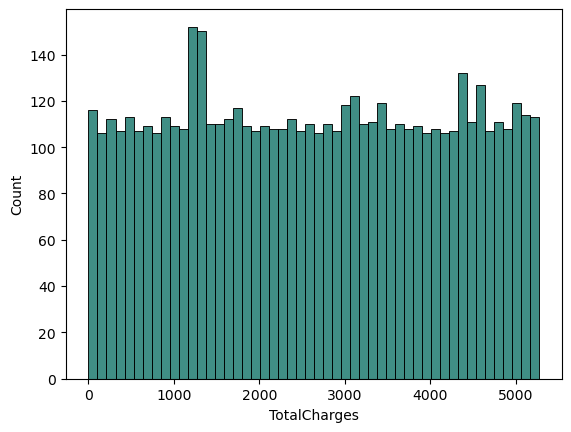

In [37]:
# Create histogram
sns.histplot(train_data['TotalCharges'], bins=50, color='#00695C')

# Show the plot
plt.show()
plt.close()

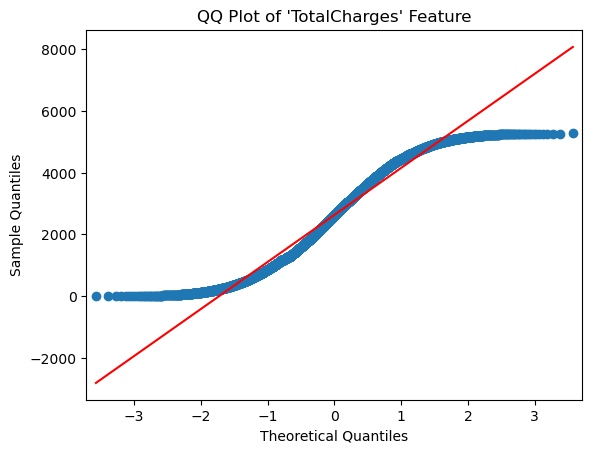

In [38]:
# Create a QQ plot for the 'TotalCharges' feature
sm.qqplot(train_data['TotalCharges'], line='s')

# Set plot labels and title
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("QQ Plot of 'TotalCharges' Feature")

# Show the plot
plt.show()
plt.close()

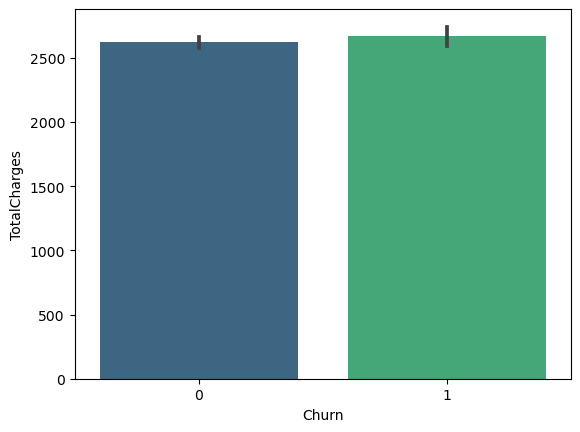

In [39]:
# Plot boxplot - churn vs TotalCharges
sns.barplot(x='Churn', y='TotalCharges', data=train_data, palette='viridis')

# Show the plot
plt.show()
plt.close()

### Churn

In [40]:
# Calculate proportions
churn_counts = train_data['Churn'].value_counts()
churn_proportions = churn_counts / len(train_data)

# Print frequency table
print(churn_counts)

0    4139
1    1495
Name: Churn, dtype: int64


<Axes: xlabel='Churn', ylabel='count'>

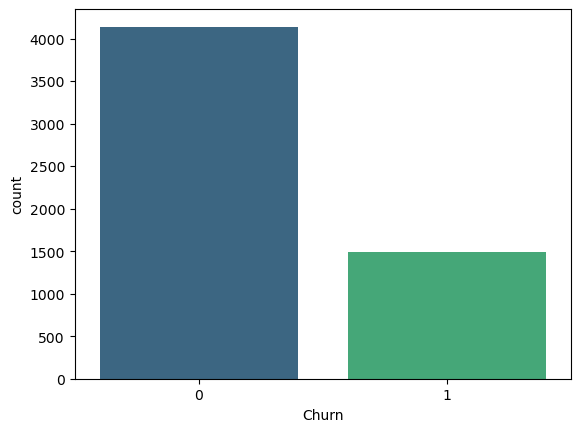

In [41]:
# Create frequency plot
sns.countplot(x='Churn', data=train_data, palette='viridis')

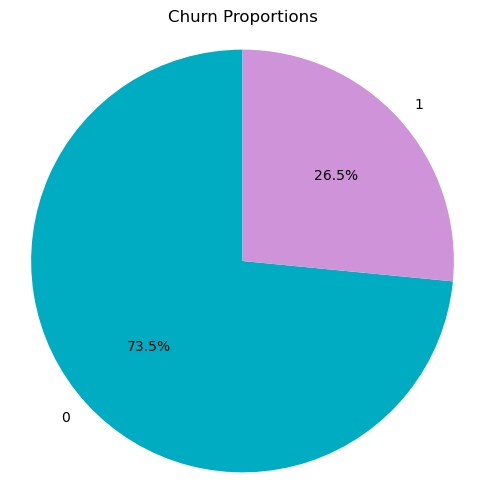

In [42]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_proportions, labels=churn_proportions.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('Churn Proportions')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

## Categorical Features (EDA)

### Payment Methods

In [43]:
# Calculate proportions
payment_counts = train_original['PaymentMethod'].value_counts()
payment_proportions = payment_counts / len(train_data)

# Print frequency table
print(payment_counts)

Electronic check             1891
Mailed check                 1286
Bank transfer (automatic)    1244
Credit card (automatic)      1213
Name: PaymentMethod, dtype: int64


## Contract

In [44]:
# Calculate proportions
contract_counts = train_original['Contract'].value_counts()
contract_proportions = contract_counts / len(train_data)

# Print frequency table
print(contract_counts)

Month-to-month    3102
Two year          1359
One year          1173
Name: Contract, dtype: int64


## Streaming Movies

In [45]:
# Calculate proportions
movies_counts = train_original['StreamingMovies'].value_counts()
proportions = movies_counts / len(train_data)

# Print frequency table
print(movies_counts)

No                     2217
Yes                    2203
No internet service    1214
Name: StreamingMovies, dtype: int64


### Streaming TV

In [46]:
# Calculate proportions
tv_counts = train_original['StreamingTV'].value_counts()
proportions = tv_counts / len(train_data)

# Print frequency table
print(tv_counts)

No                     2226
Yes                    2194
No internet service    1214
Name: StreamingTV, dtype: int64


### Tech Support

In [47]:
# Calculate proportions
support_counts = train_original['TechSupport'].value_counts()
proportions = support_counts / len(train_original)

# Print frequency table
print(support_counts)

No                     2771
Yes                    1649
No internet service    1214
Name: TechSupport, dtype: int64


### Device Protection

In [48]:
# Calculate proportions
device_counts = train_original['DeviceProtection'].value_counts()
proportions = device_counts / len(train_original)

# Print frequency table
print(device_counts)

No                     2472
Yes                    1948
No internet service    1214
Name: DeviceProtection, dtype: int64


<Axes: xlabel='DeviceProtection', ylabel='count'>

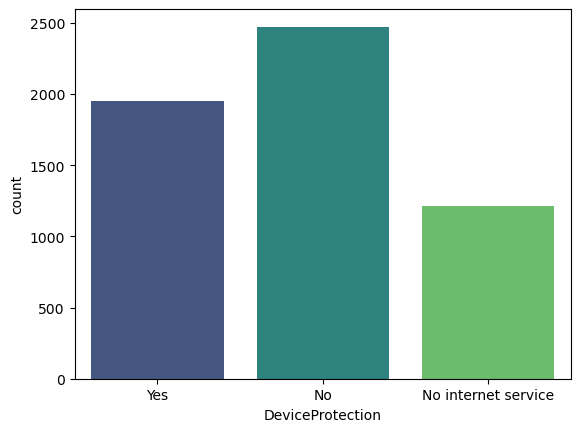

In [49]:
sns.countplot(x='DeviceProtection', data=train_original, palette='viridis')

### Internet Service

In [50]:
# Calculate proportions
internet_counts = train_original['InternetService'].value_counts()
internet_proportions = internet_counts / len(train_data)

# Print frequency table
print(internet_counts)

Fiber optic    2483
DSL            1937
No             1214
Name: InternetService, dtype: int64


### Gender

In [51]:
# Calculate proportions
gender_counts = train_data['Gender'].value_counts()
gender_proportions = gender_counts / len(train_data)

# Print frequency table
print(gender_counts)

1    2833
0    2801
Name: Gender, dtype: int64


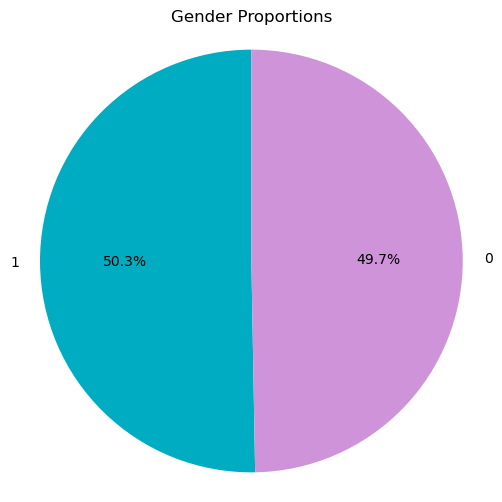

In [52]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_proportions, labels=gender_proportions.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('Gender Proportions')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()
plt.close()

### Contract

In [53]:
# Calculate proportions
contract_counts = train_original['Contract'].value_counts()
contract_proportions = contract_counts / len(train_original)

# Print frequency table
print(contract_counts)
print(contract_proportions)

Month-to-month    3102
Two year          1359
One year          1173
Name: Contract, dtype: int64
Month-to-month    0.550586
Two year          0.241214
One year          0.208200
Name: Contract, dtype: float64


<Axes: xlabel='Contract', ylabel='tenure'>

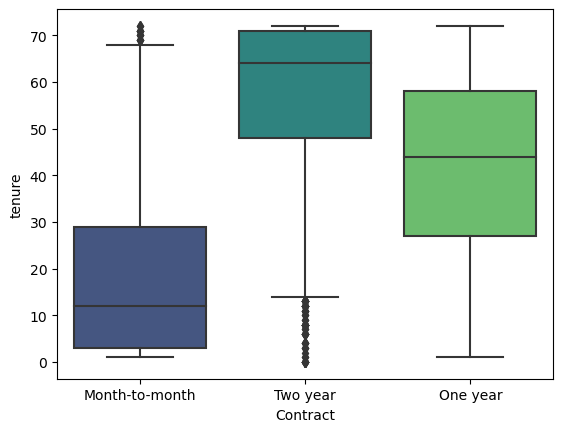

In [54]:
sns.boxplot(x='Contract', y='tenure', data=train_original, palette='viridis') 

<Axes: xlabel='Contract', ylabel='count'>

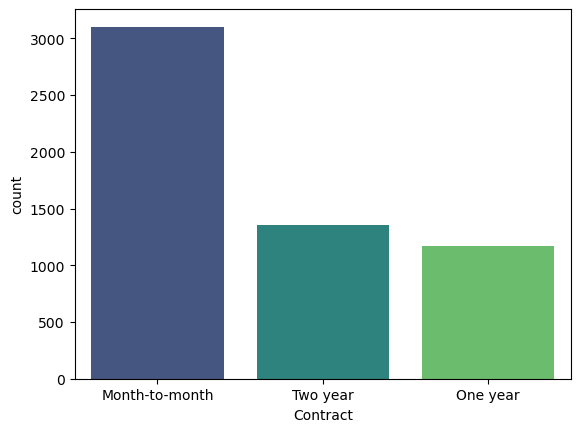

In [55]:
sns.countplot(x='Contract', data=train_original, palette='viridis')

# 04 - Feature Engineering

## Feature Scaling
- A great percentage of the features are imbalanced. Therefore, we will use Normalization.
- Normalization is useful to scale the data to a specific range, typically between 0 and 1.

In [56]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

def normal_scaler(dataframe, features):
    sc = MinMaxScaler()
    scaled_data = dataframe.copy()
    scaled_data[features] = sc.fit_transform(dataframe[features])
    return scaled_data


# Features to be on the same scaled
features_to_scale = ['Tenure', 'TotalCharges', 'MonthlyCharges']

# Scale the features
train_data = normal_scaler(train_data, features_to_scale)

## Training & Test Data split
### Full Model

In [57]:
# Define features X-matrix
X = train_data.drop(columns=['Churn'], axis=1)

# Define target y-matrix
y = train_data['Churn']

# Records comparison for the X-matrix, Y-matrix
train_data.shape, X.shape, y.shape

((5634, 20), (5634, 19), (5634,))

In [58]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=95, stratify=y)

In [59]:
X.tail()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5629,0,0,1,0,0.986111,1,2,1,0,2,2,2,2,2,2,0,2,0.91,0.895545
5630,1,0,0,0,0.027778,1,0,0,0,0,0,0,0,0,0,0,0,0.28,0.919431
5631,0,1,0,0,0.347222,1,2,1,2,2,0,0,2,2,0,1,3,0.84,0.347678
5632,0,0,1,0,0.333333,1,0,2,1,1,1,1,1,1,1,0,1,0.02,0.619905
5633,1,0,0,0,0.083333,1,0,2,1,1,1,1,1,1,0,0,3,0.02,0.026919


### Information Gain

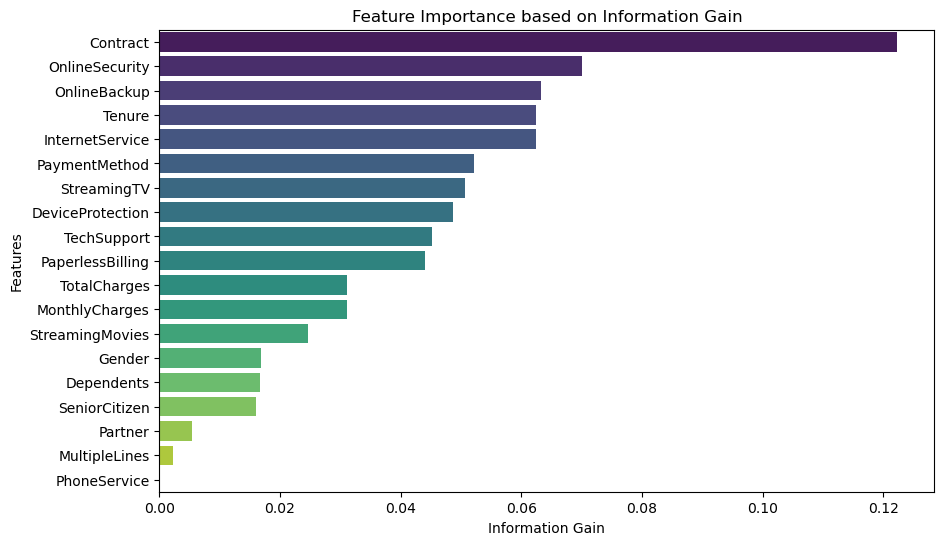

In [60]:
# Full Model
# Calculate Information Gain (IG) scores using mutual_info_regression
ig = mutual_info_regression(X, y)

# Create a DataFrame with feature names and their corresponding IG scores
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Information_Gain': ig})

# Sort the features based on IG scores from most important to least important
sorted_features = feature_scores_df.sort_values(by='Information_Gain', ascending=False)

# Plot the sorted features using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Information_Gain', y='Feature', data=sorted_features, palette='viridis')
plt.xlabel('Information Gain')
plt.ylabel('Features')
plt.title('Feature Importance based on Information Gain')
plt.show()

In [61]:
# Feature selection to improve model building
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Create a Logistic Regression Classifier
logistic_classifier = LogisticRegression(max_iter = 800)

# Create an RFECV object with cross-validation
cv_strategy = StratifiedKFold(n_splits=5, random_state=33, shuffle=True)
rfecv = RFECV(estimator=logistic_classifier, cv=cv_strategy, scoring="accuracy")

# Perform RFECV on the data (fit the RFECV object using only X)
rfecv.fit(X, y)

# Access cross-validation results using cv_results_
print(rfecv.cv_results_)

{'mean_test_score': array([0.73375913, 0.78771507, 0.7905562 , 0.79446147, 0.79286463,
       0.7976558 , 0.79250718, 0.79747802, 0.80173774, 0.80014074,
       0.79996296, 0.79943042, 0.80085043, 0.80297966, 0.80404491,
       0.80333522, 0.80386792, 0.80262553, 0.80369062]), 'std_test_score': array([0.00085032, 0.00928518, 0.00732834, 0.00669999, 0.00644122,
       0.00560327, 0.00932338, 0.00863002, 0.00789299, 0.00761293,
       0.0110344 , 0.01078167, 0.00990634, 0.01093882, 0.01105323,
       0.01090722, 0.0103303 , 0.00999762, 0.01031731]), 'split0_test_score': array([0.73291925, 0.79680568, 0.80035492, 0.80301686, 0.7985803 ,
       0.80567879, 0.8065661 , 0.80479148, 0.81188997, 0.80567879,
       0.8065661 , 0.8136646 , 0.8136646 , 0.81898846, 0.81898846,
       0.81810115, 0.81810115, 0.81632653, 0.81810115]), 'split1_test_score': array([0.73469388, 0.79148181, 0.78881988, 0.79236912, 0.78881988,
       0.79325643, 0.7905945 , 0.79503106, 0.80301686, 0.80035492,
       0.798

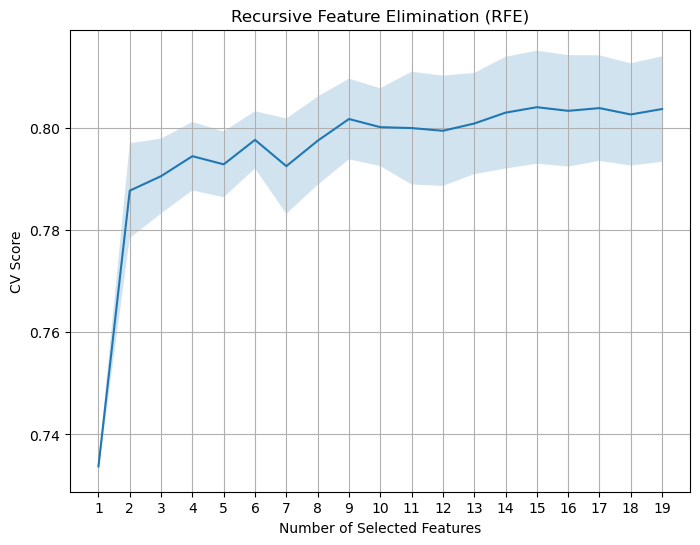

The optimal number of features: 15


In [62]:
# Plot Recursive Feature Elimination
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.fill_between(range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
                 rfecv.cv_results_['mean_test_score'] - rfecv.cv_results_['std_test_score'],
                 rfecv.cv_results_['mean_test_score'] + rfecv.cv_results_['std_test_score'],
                 alpha=0.2)
plt.grid()
plt.xticks(range(1, X.shape[1] + 1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print(f"The optimal number of features: {rfecv.n_features_}")

## Correlation Analysis

In [63]:
# Create Correlation Matrix
correlation_matrix = X.corr(numeric_only=True).abs()

# Create a mask for the upper triangle
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
upper_triangle

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Gender,NaN,0.007095,0.005150,0.008329,0.003024,0.003666,0.012235,0.003639,0.022955,0.013961,0.004630,0.018022,0.013591,0.018821,0.008318,0.025967,0.005764,0.022429,0.000536
SeniorCitizen,NaN,NaN,0.015729,0.213300,0.016980,0.008483,0.143994,0.033199,0.113953,0.009927,0.019862,0.152885,0.040783,0.043526,0.142953,0.157326,0.034873,0.220202,0.033814
Partner,NaN,NaN,NaN,0.446276,0.373689,0.023485,0.151746,0.007331,0.152095,0.148506,0.167660,0.128177,0.140947,0.132637,0.294694,0.014067,0.160857,0.101316,0.056014
Dependents,NaN,NaN,NaN,NaN,0.154892,0.004428,0.011911,0.052915,0.144639,0.085048,0.074525,0.132809,0.046677,0.018039,0.240206,0.116574,0.045481,0.115075,0.004148
Tenure,NaN,NaN,NaN,NaN,NaN,0.003653,0.349918,0.034786,0.322140,0.376786,0.373820,0.321684,0.286577,0.300744,0.670011,0.010525,0.373146,0.256591,0.163575
PhoneService,NaN,NaN,NaN,NaN,NaN,NaN,0.018338,0.392659,0.018954,0.022191,0.004724,0.022236,0.056190,0.035936,0.001380,0.005433,0.006450,0.248857,0.088298
MultipleLines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.103685,0.011646,0.130552,0.130892,0.020454,0.181295,0.188681,0.115106,0.158270,0.183152,0.436677,0.106982
InternetService,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032926,0.034818,0.051899,0.029863,0.103602,0.090085,0.093072,0.139438,0.082943,0.319689,0.045562
OnlineSecurity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.171442,0.162167,0.283377,0.042676,0.062637,0.378294,0.161843,0.089526,0.055610,0.041790
OnlineBackup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186642,0.197193,0.141195,0.133803,0.278490,0.010509,0.132885,0.126108,0.092836


In [64]:
# Return Highly correlated features
def correlation(df, threshold):
    correlated_cols = set()
    corr_matrix = df.corr(numeric_only=True)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

correlation(X, 0.5)

{'Contract'}

<Axes: >

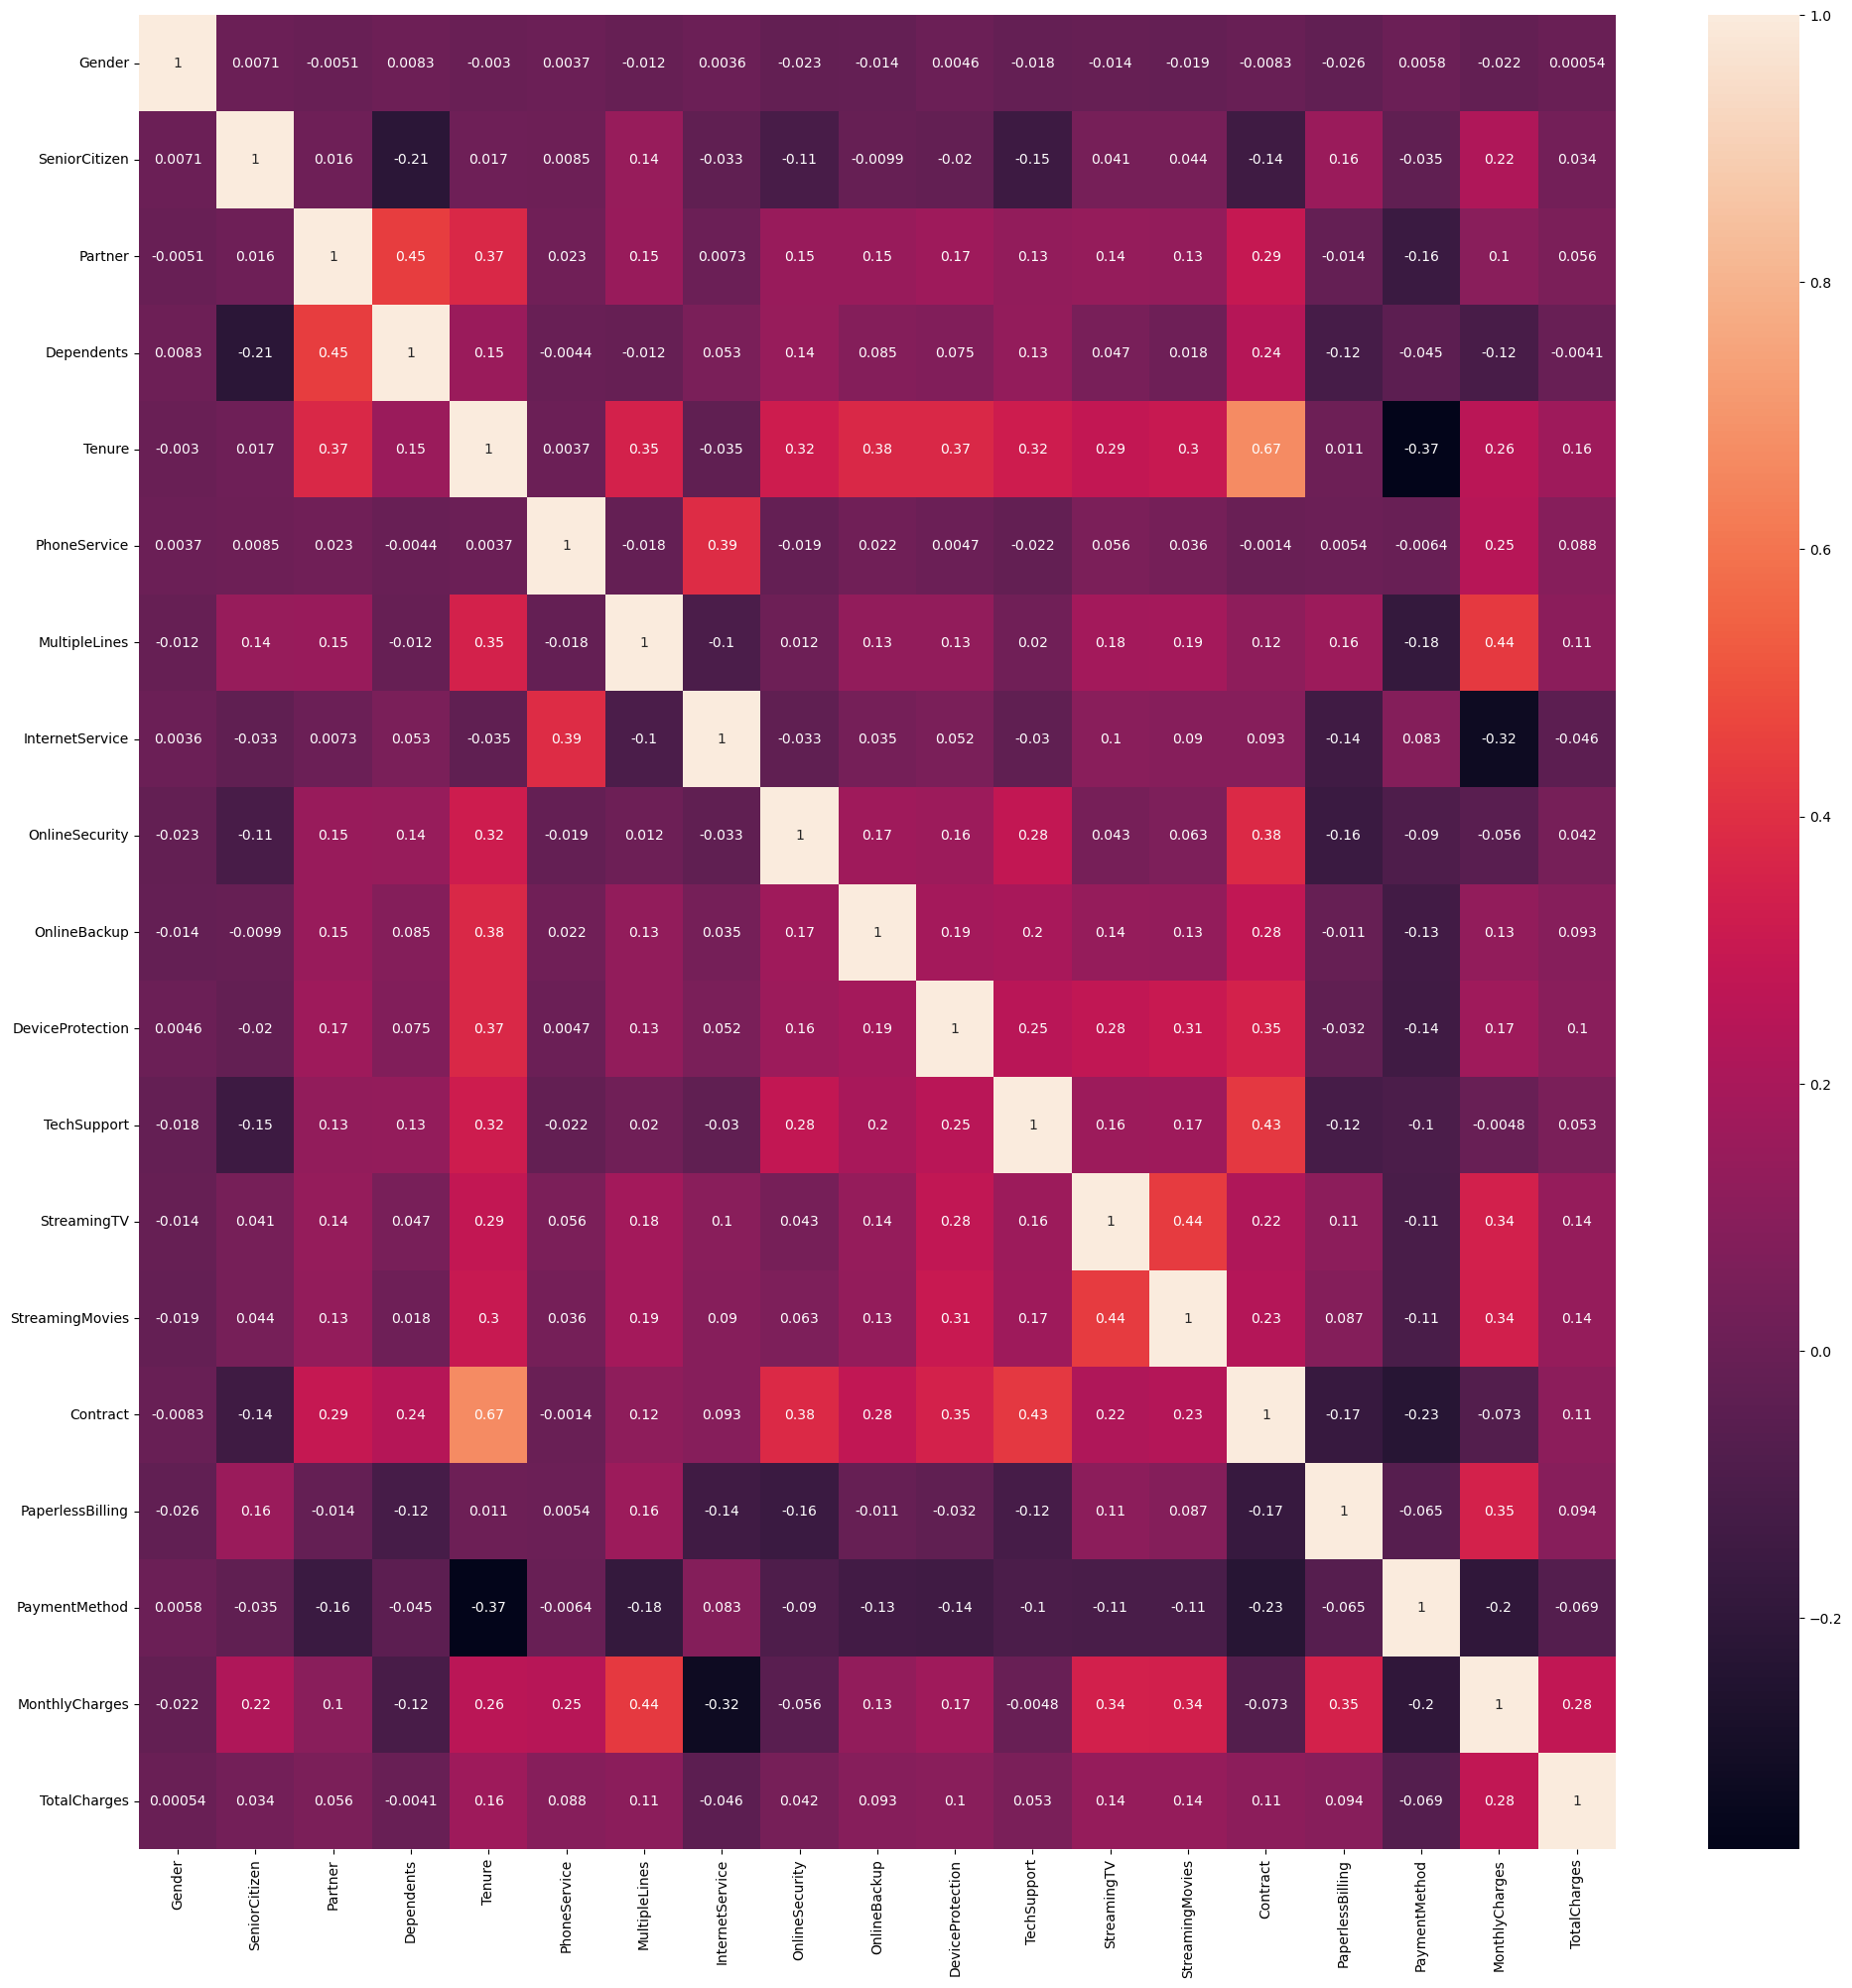

In [65]:
# Create correlations heatmap 
plt.figure(figsize=(24,24))
sns.heatmap(X.corr(), annot=True)

## Feature Selection
- The following features have been selected to be removed from the model because of their multicollinearity:
-- 'DeviceProtection', 
-- 'MultipleLines', 
-- 'OnlineBackup', 
-- 'OnlineSecurity',
-- 'TechSupport',
-- 'StreamingTV',
-- 'StreamingMovies',
-- 'Gender'

# 05 - Model Building

In [67]:
from sklearn.naive_bayes import GaussianNB

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Defining the modelling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)
        auc_score = roc_auc_score(y_true, y_pred)
        print("AUC Score: %.5f"% auc_score)

    print_scores(alg, y_test, y_pred)
    return model


### Logistic Regression

In [68]:
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.8018923713778829
precision:  0.6716867469879518
recall:  0.49665924276169265
f1_score:  0.7915090315615723
AUC Score: 0.70445


### Decision Tree

In [69]:
tree_model = modeling(DecisionTreeClassifier, 'Decision Tree')

Decision Tree
accuracy:  0.732702542874039
precision:  0.4968421052631579
recall:  0.5256124721603563
f1_score:  0.7350495244986686
AUC Score: 0.66659


### Random Forest

In [70]:
forest_model = modeling(RandomForestClassifier, 'Random Forest')

Random Forest
accuracy:  0.7900650502661147
precision:  0.6566666666666666
recall:  0.43875278396436523
f1_score:  0.7751237208851761
AUC Score: 0.67791


### Gradient Boosting

In [71]:
gradient_model = modeling(GradientBoostingClassifier, 'Gradient Boosting')

Gradient Boosting
accuracy:  0.7959787108219988
precision:  0.6710526315789473
recall:  0.45434298440979953
f1_score:  0.7819615270953358
AUC Score: 0.68691


### SVM - Support Vector Machine

In [72]:
svm_model = modeling(SVC, 'SVC')

SVC
accuracy:  0.7823772915434654
precision:  0.6539923954372624
recall:  0.3830734966592428
f1_score:  0.7615319703120953
AUC Score: 0.65490


### XG Boosting

In [73]:
xg_model = modeling(XGBClassifier, 'XG Boosting')

XG Boosting
accuracy:  0.7776463630987581
precision:  0.5989159891598916
recall:  0.4922048997772829
f1_score:  0.7702421801093586
AUC Score: 0.68652


## Subset Model X1

In [74]:
X1 = X.drop(['DeviceProtection', 'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Gender'], axis=1)
X1.tail()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5629,0,1,0,0.986111,1,1,2,0,2,0.91,0.895545
5630,0,0,0,0.027778,1,0,0,0,0,0.28,0.919431
5631,1,0,0,0.347222,1,1,0,1,3,0.84,0.347678
5632,0,1,0,0.333333,1,2,1,0,1,0.02,0.619905
5633,0,0,0,0.083333,1,2,0,0,3,0.02,0.026919


## Splitting X1

In [75]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=95, stratify=y)

## Training Models for X1

In [76]:
# Training Models for subset X1
log_model = modeling(LogisticRegression, 'Logistic Regression')
tree_model = modeling(DecisionTreeClassifier, '\nDecision Tree')
forest_model = modeling(RandomForestClassifier, '\nRandom Forest')
gradient_model = modeling(GradientBoostingClassifier, '\nGradient Boosting')
svm_model = modeling(SVC, '\nSVC')
xg_model = modeling(XGBClassifier, '\nXG Boosting')

Logistic Regression
accuracy:  0.7934705464868701
precision:  0.654275092936803
recall:  0.47058823529411764
f1_score:  0.7815929154498412
AUC Score: 0.69037

Decision Tree
accuracy:  0.7217885024840313
precision:  0.47715736040609136
recall:  0.5026737967914439
f1_score:  0.7240539187684283
AUC Score: 0.65182

Random Forest
accuracy:  0.7757274662881476
precision:  0.60431654676259
recall:  0.44919786096256686
f1_score:  0.764186633358496
AUC Score: 0.67146

Gradient Boosting
accuracy:  0.7977288857345636
precision:  0.6692015209125475
recall:  0.47058823529411764
f1_score:  0.7852527799604678
AUC Score: 0.69327

SVC
accuracy:  0.7970191625266146
precision:  0.6864406779661016
recall:  0.43315508021390375
f1_score:  0.7804021861801766
AUC Score: 0.68083

XG Boosting
accuracy:  0.7643718949609652
precision:  0.567741935483871
recall:  0.47058823529411764
f1_score:  0.7568816752970094
AUC Score: 0.67056


# Parameter Tuning
## Fine Tuning for Logistic Regression classifier
- Using Randomized Search to build a Logistic Regression classifier

In [77]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import uniform

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=95)

# Create the Logistic Regression Classifier
clf = LogisticRegression()

# Define hyperparameter search space
param_dist = {
    'C': uniform(0.1, 10),  # Regularization parameter
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=5, random_state=95)

# Perform the parameter search on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters found
best_params = random_search.best_params_

# Train the classifier with the best hyperparameters on the full training data
clf_tuning = LogisticRegression(**best_params)
clf_tuning.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy_tuning = clf_tuning.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy_tuning)

# Predict probabilities on the test set
y_tuning = clf_tuning.predict_proba(X_test)

# Calculate ROC AUC score
roc_tuning = roc_auc_score(y_test, y_tuning[:, 1])
print("AUC Score: %.5f"% roc_tuning)

Best Hyperparameters: {'C': 5.429833834341421, 'max_iter': 200, 'solver': 'newton-cg'}
Test Accuracy: 0.8003549245785271
AUC Score: 0.83446


In [78]:
# log_model = modeling(LogisticRegression, 'Logistic Regression', {'C': 5.43, 'max_iter': 200, 'solver': 'newton-cg'})
log_model = modeling(LogisticRegression, 'Logistic Regression', {'C': 2.39, 'max_iter': 400, 'solver': 'liblinear'})

Logistic Regression
accuracy:  0.8003549245785271
precision:  0.6081632653061224
recall:  0.5359712230215827
f1_score:  0.7959593998889437
AUC Score: 0.71145


## Fine Tuning for Gradient Boosting
- Using Randomized Search to build a Gradient Boosting classifier

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint, uniform

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=95)

# Create a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=95)

# Define the hyperparameter grid for randomized search
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.5, 0.5),
}

# Create a RandomizedSearchCV object
rs = RandomizedSearchCV(estimator=gb_clf,
                        param_distributions=param_dist,
                        scoring='accuracy',
                        cv=5,
                        n_iter=20,
                        random_state=95,
                        n_jobs=-1)

# Perform the randomized search on your data
rs.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", rs.best_params_)
print("Best Score:", rs.best_score_)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Parameters: {'learning_rate': 0.0415398486541058, 'max_depth': 6, 'min_samples_leaf': 17, 'min_samples_split': 16, 'n_estimators': 82, 'subsample': 0.8770324380970855}
Best Score: 0.7947643785791101


## Gradient Boosting Model

In [80]:
gradient_model = modeling(GradientBoostingClassifier, '\nGradient Boosting', {'learning_rate': 0.04, 'max_depth': 6, 'min_samples_leaf': 17, 'min_samples_split': 16, 'n_estimators': 82, 'subsample': 0.88, 'random_state': 95})


Gradient Boosting
accuracy:  0.7976929902395741
precision:  0.6086956521739131
recall:  0.5035971223021583
f1_score:  0.7909160311226706
AUC Score: 0.69880


# 06 - Model Performance & Selection

## Ensemble Method ** Good Performance **
- Gradient Boosting in combination with Logistic regression gave the best results, yet.
- A threshold was used in a the classification model to determine the boundary for converting predicted probabilities into actual class predictions.
- By changing the threshold, we created a more balanced model between precision and recall.

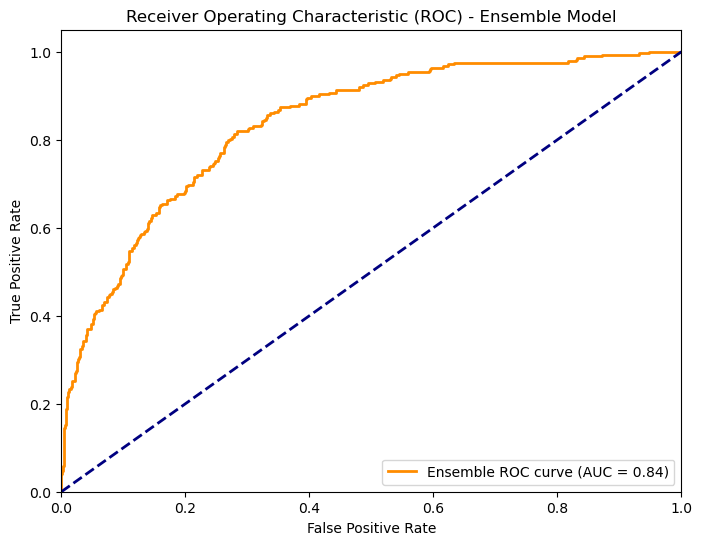

Ensemble Accuracy: 0.74978
Ensemble ROC AUC Score: 0.83786
Confusion Matrix:
[[633 216]
 [ 66 212]]
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       849
           1       0.50      0.76      0.60       278

    accuracy                           0.75      1127
   macro avg       0.70      0.75      0.71      1127
weighted avg       0.80      0.75      0.76      1127



In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=95)

# Create and train models
lreg_params = {'C': 5.43, 'max_iter': 200, 'solver': 'newton-cg'}
gradient_params = {'learning_rate': 0.14, 'max_depth': 3, 'min_samples_leaf': 11, 'min_samples_split': 6, 'n_estimators': 69, 'subsample': 0.54}

logistic_reg = LogisticRegression(**lreg_params)
logistic_reg.fit(X_train, y_train)
lr_pred_prob = logistic_reg.predict_proba(X_test)[:, 1]

gradient_boosting = GradientBoostingClassifier(**gradient_params)
gradient_boosting.fit(X_train, y_train)
gb_pred_prob = gradient_boosting.predict_proba(X_test)[:, 1]

# Calculate the ensemble predicted probabilities
ensemble_pred_prob = (gb_pred_prob + lr_pred_prob) / 2

# Apply the threshold to get binary predictions
threshold = 0.30
ensemble_predictions = (ensemble_pred_prob > threshold).astype(int)

# Calculate ROC curve for the ensemble
fpr_ensemble, tpr_ensemble, thresholds_ensemble = roc_curve(y_test, ensemble_pred_prob)
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ensemble, tpr_ensemble, color='darkorange', lw=2, label=f'Ensemble ROC curve (AUC = {roc_auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Ensemble Model')
plt.legend(loc='lower right')
plt.show()

# Calculate and display metrics
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_roc_auc = roc_auc_score(y_test, ensemble_pred_prob)
conf_matrix = confusion_matrix(y_test, ensemble_predictions)

print(f'Ensemble Accuracy: {ensemble_accuracy:.5f}')
print(f'Ensemble ROC AUC Score: {ensemble_roc_auc:.5f}')
print('Confusion Matrix:')
print(conf_matrix)
print(classification_report(y_test, ensemble_predictions))


# 07 - Conclusion
Machine learning models enable companies to not only identify customers at risk of leaving but also uncover underlying patterns and factors that contribute to churn. Armed with this knowledge, businesses can tailor their outreach efforts, offering personalized incentives and solutions that resonate with individual customer needs.
By focusing on preemptive actions and a deeper understanding of customer behavior, businesses can forge stronger customer relationships, enhance loyalty, and ultimately drive sustained growth in an increasingly competitive marketplace.
The analysis of customers with a higher probability of churn reveals specific patterns that contribute to their likelihood to disengage from a service. This group tends to consist of individuals who are more likely to be single, have no dependents, and possess lower income levels. Additionally, their preference for shorter contract durations, particularly month-to-month arrangements, signifies a desire for flexibility and less commitment. This aligns with their tendency to have lower tenure, implying a relatively short engagement with the service. The trend of higher monthly charges, particularly for fiber optic internet services, suggests that these customers may be more sensitive to costs and are seeking value for their investment. Interestingly, the presence of a phone plan indicates a potential cross-service offering, which could influence their decision to leave. By identifying and understanding these customer characteristics, businesses can tailor retention strategies to address their unique needs, enhance value propositions, and ultimately mitigate churn among this specific segment.

***
# --- Test Set ---
***

# Dataset

In [82]:
# Load the Test data from the specified address
test_original_df = pd.read_csv('/kaggle/input/map-6990-summer-2023-capstone-project-kaggle-cus/test.csv')

# Data Preparation

In [83]:
# Create a working copy of the DataFrame
test_data = test_original_df.copy()

# Drop null records
test_data = test_data.dropna()

# Rename columns
test_data = test_data.rename(columns={'gender': 'Gender', 'tenure': 'Tenure'})
# Info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1409 non-null   int64  
 1   customerID        1409 non-null   object 
 2   Gender            1409 non-null   object 
 3   SeniorCitizen     1409 non-null   int64  
 4   Partner           1409 non-null   object 
 5   Dependents        1409 non-null   object 
 6   Tenure            1409 non-null   int64  
 7   PhoneService      1409 non-null   object 
 8   MultipleLines     1409 non-null   object 
 9   InternetService   1409 non-null   object 
 10  OnlineSecurity    1409 non-null   object 
 11  OnlineBackup      1409 non-null   object 
 12  DeviceProtection  1409 non-null   object 
 13  TechSupport       1409 non-null   object 
 14  StreamingTV       1409 non-null   object 
 15  StreamingMovies   1409 non-null   object 
 16  Contract          1409 non-null   object 


# Feature Engineering

In [84]:
test_data = test_data.drop(['ID','customerID'], axis=1)

In [85]:
try:
    test_data['TotalCharges'] = test_data['TotalCharges'].astype(float)
except ValueError as ve:
    print (ve)

could not convert string to float: ' '


In [86]:
# Descriptive statistics for categorical features
categorical_columns = test_data.describe(include = "object")

# Encode categorical features to numerical
for column in categorical_columns:
    test_data[column] = LabelEncoder().fit_transform(test_data[column])

# Feature Scaling

In [87]:
# Normalization

# Features to be on the same scaled
features_to_scale = ['Tenure', 'TotalCharges', 'MonthlyCharges']

# Scale the features
test_data = normal_scaler(test_data, features_to_scale)

# Feature Selection

In [88]:
test_data = test_data.drop(['DeviceProtection', 'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Gender'], axis=1)
test_data.tail()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1404,0,1,1,0.680556,1,0,1,1,3,0.699645,0.584302
1405,0,1,1,0.388889,1,2,2,1,1,0.020802,0.648983
1406,0,0,0,0.069444,1,2,0,0,0,0.024353,0.981105
1407,0,0,0,0.777778,1,2,2,0,0,0.014713,0.015988
1408,0,1,1,1.000000,1,0,2,1,0,0.529680,0.686773


# Model Selection

In [89]:
# Train the final model on the entire dataset
final_model = GradientBoostingClassifier(**gradient_params)
final_model.fit(X1, y)

GradientBoostingClassifier(learning_rate=0.14, min_samples_leaf=11,
                           min_samples_split=6, n_estimators=69,
                           subsample=0.54)

In [90]:
# Predict on the test data for submission
final_pred_prob = final_model.predict_proba(test_data)[:, 1]
final_predictions = (final_pred_prob > threshold).astype(int)

# Submission File

In [91]:
# Convert the predictions to a DataFrame
submission_df = pd.DataFrame({
    'ID': test_original_df['ID'],  # Assuming the ID column starts from 1
    'Churn': final_predictions
})

# Save the predictions to a CSV file for submission
submission_df.to_csv('submission.csv', index=False)

# Final Comparison

# Compare training & test model results

In [92]:
print(y.value_counts(normalize=True))
print(submission_df.iloc[:,1].value_counts(normalize=True))

0    0.734647
1    0.265353
Name: Churn, dtype: float64
0    0.620298
1    0.379702
Name: Churn, dtype: float64
